<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/mild_DR_moderate_DR_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split')

['train', 'val', 'test']

In [2]:
os.listdir('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/train')

['Mild', 'Moderate']

In [4]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/train',
                                          target_size=(64,64),
                                          class_mode='binary')
valimages = datagen.flow_from_directory('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/val',
                                        target_size=(64,64),
                                        class_mode='binary')
testimages = datagen.flow_from_directory('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/test',
                                         target_size=(64,64),
                                         class_mode='binary')

Found 1163 images belonging to 2 classes.
Found 108 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [52]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)),
                    MaxPooling2D(2,2),

                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Flatten(),
                    Dropout(0.5),
                    Dense(128, activation='relu'),
                    Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dropout (Dropout)           (None, 12544)            

In [53]:
model.fit(trainimages,
          batch_size=32,
          epochs=5,
          validation_data=valimages)
model.save('mild_moderate_DRCNN_model.keras')

Epoch 1/5
37/37 [==============================] - 16s 388ms/step - loss: 0.5546 - accuracy: 0.7206 - val_loss: 0.4224 - val_accuracy: 0.7593
Epoch 2/5
37/37 [==============================] - 13s 347ms/step - loss: 0.4969 - accuracy: 0.7420 - val_loss: 0.4301 - val_accuracy: 0.7593
Epoch 3/5
37/37 [==============================] - 13s 333ms/step - loss: 0.4841 - accuracy: 0.7420 - val_loss: 0.4364 - val_accuracy: 0.7500
Epoch 4/5
37/37 [==============================] - 13s 349ms/step - loss: 0.4749 - accuracy: 0.7360 - val_loss: 0.4145 - val_accuracy: 0.7870
Epoch 5/5
37/37 [==============================] - 13s 330ms/step - loss: 0.4741 - accuracy: 0.7498 - val_loss: 0.4222 - val_accuracy: 0.7778


In [77]:
predictions = model.predict(testimages)

4/4 [==============================] - 1s 159ms/step


In [78]:
predictions[predictions<0.5]=0
predictions[predictions>0.5]=1

In [13]:
y_true = testimages.classes

In [79]:
from sklearn import metrics
metrics.confusion_matrix(y_true, predictions)

array([[ 8, 19],
       [ 7, 64]])

In [80]:
print(metrics.classification_report(y_true, predictions, target_names=['Mild DR', 'Moderate DR'] ))

              precision    recall  f1-score   support

     Mild DR       0.53      0.30      0.38        27
 Moderate DR       0.77      0.90      0.83        71

    accuracy                           0.73        98
   macro avg       0.65      0.60      0.61        98
weighted avg       0.71      0.73      0.71        98



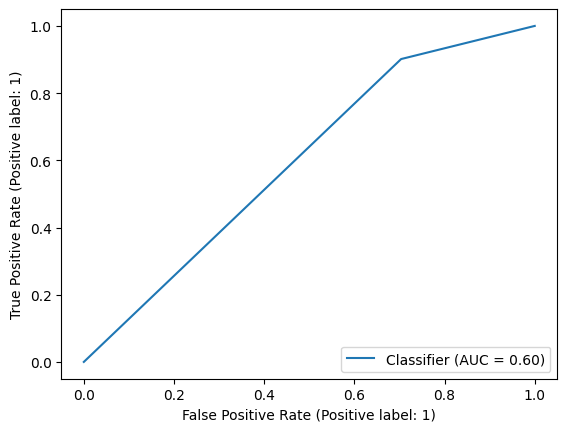

In [81]:
metrics.RocCurveDisplay.from_predictions(y_true, predictions)

In [17]:
testimages.class_indices

{'Mild': 0, 'Moderate': 1}

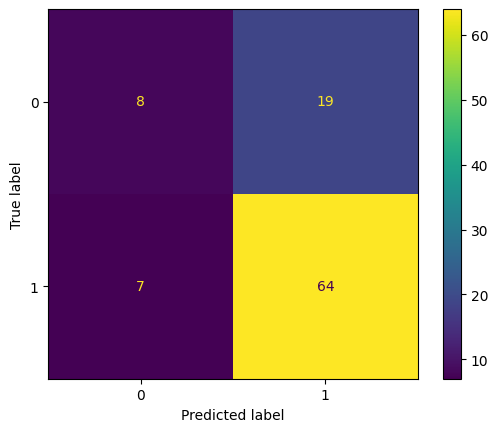

In [82]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, predictions)

1/1 [==============================] - 0s 176ms/step
Prediction: Mild DR


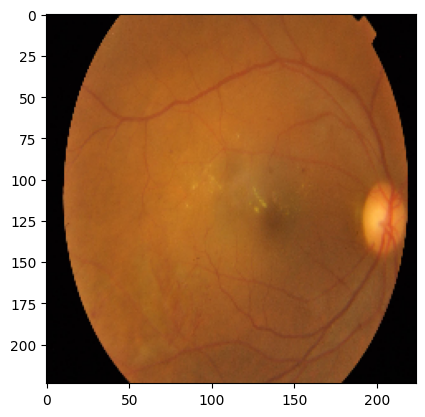

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/mild_moderate_DRCNN_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Moderate DR"  # Example class names, modify as per your binary classes
    else:
        return "Mild DR"

# Example usage:
unknown_image_path = "/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/test/Mild/172df1330a60.png"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/test/Mild/172df1330a60.png')
plt.imshow(testimage)

1/1 [==============================] - 0s 88ms/step
Prediction: Moderate DR


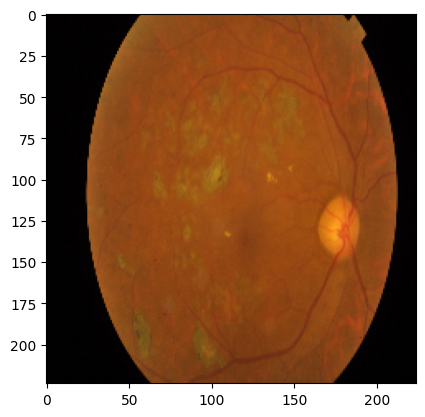

In [ ]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/test/Moderate/041f09eec1e8.png"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/test/Moderate/041f09eec1e8.png')
plt.imshow(testimage)

In [ ]:
# Example usage:
unknown_image_path = ""  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('')
plt.imshow(testimage)

In [ ]:
# Example usage:
unknown_image_path = ""  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('')
plt.imshow(testimage)

In [ ]:
# Example usage:
unknown_image_path = ""  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('')
plt.imshow(testimage)

In [ ]:
# Example usage:
unknown_image_path = ""  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('')
plt.imshow(testimage)

In [ ]:
# Example usage:
unknown_image_path = ""  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('')
plt.imshow(testimage)